In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [5]:
genes = ['gene' + str(i) for i in range(1, 101)]

In [6]:
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [10]:
df = pd.DataFrame(columns=[*wt, *ko], index = genes)
df.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for gene in df.index:
    df.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 10000), size=5)
    df.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 10000), size=5)

In [38]:
scaled_df = StandardScaler().fit_transform(df.T)

In [39]:
pca = PCA()

In [40]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
pca_data = pca.transform(scaled_df)

In [44]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

TypeError: 'str' object is not callable

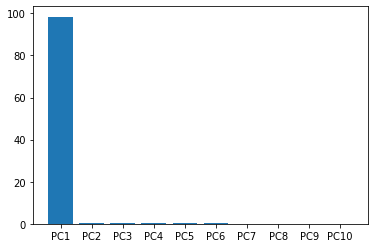

In [56]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of explained variance')
#plt.xlabel("principal component")
#plt.title('Scree plot')
plt.show()

In [60]:
pca_df = pd.DataFrame(pca_data, columns=[*wt, *ko], index=labels)
pca_df.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
PC1,-10.038009,-0.554372,-0.708562,-0.624295,0.081718,-0.034292,-0.072054,0.599817,0.141572,-1.942890e-16
PC2,-9.817706,-0.345887,-0.255382,0.365020,-0.316482,0.669879,-0.523288,-0.294466,-0.164309,-2.581269e-15
PC3,-9.773874,1.451824,0.448610,-0.494006,0.265856,0.061628,-0.033802,0.016593,-0.176318,-1.387779e-16
PC4,-9.913666,-0.522751,0.964567,0.678047,0.042538,-0.595873,-0.030295,0.182467,-0.041099,6.661338e-16
PC5,-10.057843,-0.007601,-0.437174,0.078447,-0.081107,-0.098249,0.647070,-0.505172,0.242926,1.526557e-15


NameError: name 'PC1' is not defined

In [65]:
plt.scatter(pca_df.PC1, pca_df.PC2)

NameError: name 'PC1' is not defined